In [ ]:
!pip install google-play-scraper -q

In [ ]:
!pip install git+https://github.com/scikit-learn-contrib/hdbscan.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install --upgrade ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.3 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.4 which is incompatible.


In [ ]:
!pip install pyLDAvis==2.1.2 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install BERTopic -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 42.9 MB/s eta 0:00:00


In [ ]:
!pip install unidecode -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.7 MB/s eta 0:00:00


In [ ]:
from unidecode import unidecode
from bertopic import BERTopic
from umap import UMAP
import pandas as pd
import spacy

!spacy download pt_core_news_sm -q
nlp = spacy.load('pt_core_news_sm')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 51.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from google_play_scraper import Sort, reviews, app

In [ ]:
# Parâmetro que recebe a identificação do app a ser analisado
id_app = 'com.twitter.android'  # Alterar para o identificador do aplicativo Desejado

In [ ]:
result, continuation_token = reviews(
    id_app,
    lang='pt', # default é 'en'
    country='br', # default é 'us'
    sort=Sort.MOST_RELEVANT, # default é Sort.NEWEST
    count=1000, # default é 100, mas pode ser muito mais...
)

In [ ]:
df = pd.DataFrame(result)

In [ ]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,e49a57ce-c0e7-45bf-82d6-f417ca0e614d,José Augusto,https://play-lh.googleusercontent.com/a-/ALV-U...,"Desde que passou a ser ""X"" o app piorou demais...",1,9,10.44.0-release.0,2024-06-11 16:50:47,None,None,10.44.0-release.0
1,5f9c51a7-0e00-4d9f-a354-dbebb8cb0a70,Ericck Yaki,https://play-lh.googleusercontent.com/a-/ALV-U...,"Depois que o Twitter passou a ser o X, alguns ...",3,196,10.40.0-release.0,2024-05-13 19:29:10,None,None,10.40.0-release.0
2,bfc6fe05-f63e-4c69-a249-97f75b5eff82,arthurk,https://play-lh.googleusercontent.com/a-/ALV-U...,Até então não tô tendo muitos problemas freque...,3,1171,10.33.0-release.0,2024-03-26 22:15:05,None,None,10.33.0-release.0
3,4d50ebef-4ab1-455a-9032-332b80cc5930,Joyce Barbosa,https://play-lh.googleusercontent.com/a/ACg8oc...,o app não carrega a timeline e absolutamente n...,1,1853,10.39.0-release.0,2024-05-01 23:02:19,None,None,10.39.0-release.0
4,a04661ae-1069-4124-b53a-99d56189b7ed,Pedro,https://play-lh.googleusercontent.com/a-/ALV-U...,"Nunca tive problemas quando era o Twitter, dep...",1,3807,10.29.0-release.0,2024-02-24 02:33:42,None,None,10.29.0-release.0


In [ ]:
# Filtragem de reviews com pontuações baixas (1 e 2)
df = df[df['score'].isin([1, 2])]

In [ ]:
# Ajustar tamanho da amostra para não exceder o tamanho do DataFrame
sample_size = min(500, len(df))
df = df.sample(sample_size, replace=False)

In [ ]:
# Limpeza básica do conteúdo dos reviews
df['content'] = df['content'].apply(lambda x: str(x).encode('utf-8', errors='replace').decode())

In [ ]:
# Função para lematização e limpeza do texto
def clearing_sentence(sentence):
    return [token.lemma_ for token in nlp(sentence.lower()) if (token.is_alpha and not token.is_stop)]

In [ ]:
df['clear_content'] = df['content'].apply(clearing_sentence)

In [ ]:
# Converter listas de palavras lematizadas de volta para strings
def array_to_string(arr):
    return ' '.join(arr)

In [ ]:
df['clear'] = df['clear_content'].apply(array_to_string)

In [ ]:
# Normalização dos textos
df['clear'] = df['clear'].apply(unidecode)

O BERTopic usa modelos de linguagem pré-treinados, como BERT, para converter textos em vetores densos que capturam o significado semântico dos documentos.

In [ ]:
# Modelagem de tópicos usando BERTopic
model = BERTopic(language="portuguese", nr_topics='auto')

In [ ]:
docs = df['clear'].values

In [ ]:
# Filtrar documentos curtos
# Texto curto
docs_clean = [doc for doc in docs if len(doc) > 40]

In [ ]:
# Verificar se há documentos suficientes para modelagem de tópicos
if len(docs_clean) > 0:
    try:
        topics, probs = model.fit_transform(docs_clean)

        # Obtenção das informações dos tópicos
        freq = model.get_topic_info()
        display(freq)

        # Exibir o documento representativo do tópico 5 (se existir)
        if len(freq) > 5:
            print(freq['Representative_Docs'].iloc[5])
        else:
            print("Não há tópicos suficientes para exibir o documento representativo do tópico 5.")

        data = {'Doc': docs_clean, 'Topic': topics, 'Prob': probs}
        df_topics = pd.DataFrame(data)
        display(df_topics.sample(30))

        # Análise de documentos por tópico
        display(df_topics[df_topics['Topic'] == 5]['Doc'].values)
        display(df_topics['Topic'].value_counts())
    except IndexError:
        print("Não foi possível gerar tópicos suficientes.")
else:
    print("Não há documentos suficientes para a modelagem de tópicos.")

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

,Topic,Count,Name,Representation,Representative_Docs
0,-1,147,-1_aplicativo_app_carregar_ficar,"[aplicativo, app, carregar, ficar, pra, simple...",[aplicativo ta ter problema hora postar dar er...
1,0,124,0_app_aplicativo_fechar_ficar,"[app, aplicativo, fechar, ficar, conta, proble...",[ficar fechar hora usar dm app ficar fechar da...
2,1,108,1_twitter_carregar_pra_conta,"[twitter, carregar, pra, conta, ta, horrivel, ...",[comentario hoje resolver dizer mau baixar twi...
3,2,31,2_timeline_atualizar_carregar_hora,"[timeline, atualizar, carregar, hora, acontece...",[aplicativo nao carregar timeline ja verifique...
4,3,30,3_video_carregar_imagem_aplicativo,"[video, carregar, imagem, aplicativo, ficar, p...",[haver problema visualizar video muito process...
5,4,26,4_senha_conta_login_consigir,"[senha, conta, login, consigir, recuperar, ace...",[hoje consigir recuperar senha horrivel lembro...
6,5,25,5_foto_trocar_perfil_mudar,"[foto, trocar, perfil, mudar, consigir, ficar,...",[aplicativo ruim consigir trocar foto perfil h...


['hoje consigir recuperar senha horrivel lembro nome usuario usar consigo vontade abrir aplicativo entrar consizer erro Senha mudar aguentar ir instalar', 'consigir conectar facebook consigir acessar conta alguem hackear gmail excluir lembro senha ano usar app suporte ajudar absolutamente consigir acessar gmail lembro Senha consequentemente consigir redefinir senha unico facebook opcao p solucionar', 'conseguir acessar conta jeito nenhum dificil acessar conta existente aplicativo criar dificil esquecer senha aplicativo mexo aplicativo deixar trocar senha jeito nenhum odiei']


,Doc,Topic,Prob
481,app carregar lento pesar atualizado ingles con...,1,0.958575
82,ultimamente aplicativo decepcionar diversos ma...,-1,0.000000
329,absurdo deslogar conta necessidade bloqueer mo...,1,0.752804
100,ta acontecer aplicativo ficar fechar sozinho p...,0,0.981198
87,app atualizar varias hora seguido dia cheio bo...,0,0.799403
5,atualizar simplesmente feed carregar tortura r...,-1,0.000000
67,usar rede social sentir desmotivar sinto atual...,-1,0.000000
177,tenebroso aplicativo simplesmente abrir tento ...,0,0.937868
235,lixo poha ficar demorar pra abrir video Intern...,3,1.000000
445,app falha frequente reproduzir midia conectar ...,-1,0.000000


array(['pessimo ta ruim mau pra olhar foto publicacao',
       'bugs principalmente pessoa trocar foto mudar foto alterar emtre outraa atrapalhar utilizacao app',
       'conseguir mudar foto perfil perder conta desinstalei instalei resolver problema',
       'quase enviar x erro link foto postagem erro pensar pagar nao pagar ta bugar',
       'q mudar dono ta terrivel perder mt essencia app contar bugs atoa foto perfil consigo trocar direito pagina totalmente desnecessario',
       'q aplicativo mudar x realmente ficar pessimo consigir mudar foto perfil criar conta tbm problema q resolr problema q aplicativo ficar bom',
       'aplicativo ruim consigir trocar foto perfil hora ficar dar erro elon muskr fazer trabalho direito',
       'horrivel mudar aspecto perfil simplesmente funcionar mandar email responder',
       'app mudar drasticamente identidade visual ar ter problema semana tentar mudar foto perfil acontecer trocar volta pra antiga perceber irritante',
       'conseguir trocar

Topic
-1    147
 0    124
 1    108
 2     31
 3     30
 4     26
 5     25
Name: count, dtype: int64

In [ ]:
from textblob import TextBlob
#TextBlob para calcular a polaridade do sentimento de um texto.
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['content'].apply(get_sentiment)
df['sentiment'].describe()


count    500.000000
mean       0.004377
std        0.098730
min       -0.750000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.700000
Name: sentiment, dtype: float64

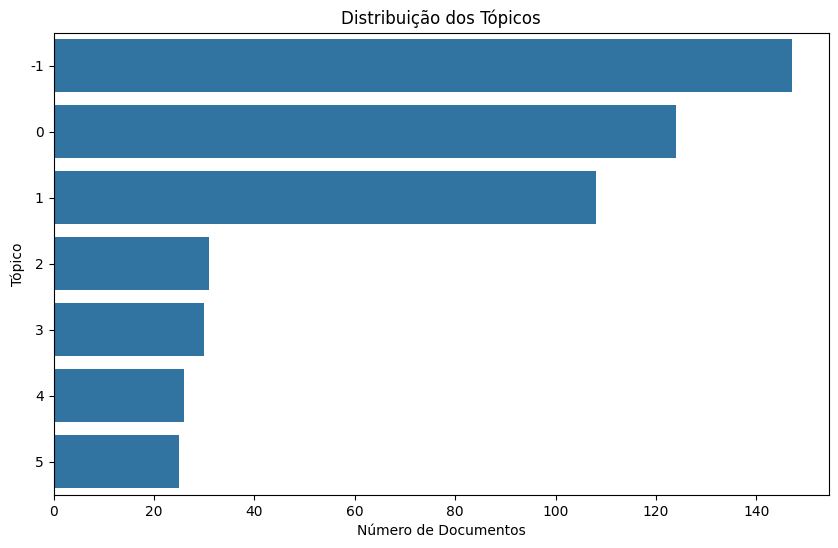

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Distribuição dos tópicos
plt.figure(figsize=(10, 6))
sns.countplot(y='Topic', data=df_topics, order=df_topics['Topic'].value_counts().index)
plt.title('Distribuição dos Tópicos')
plt.xlabel('Número de Documentos')
plt.ylabel('Tópico')
plt.show()


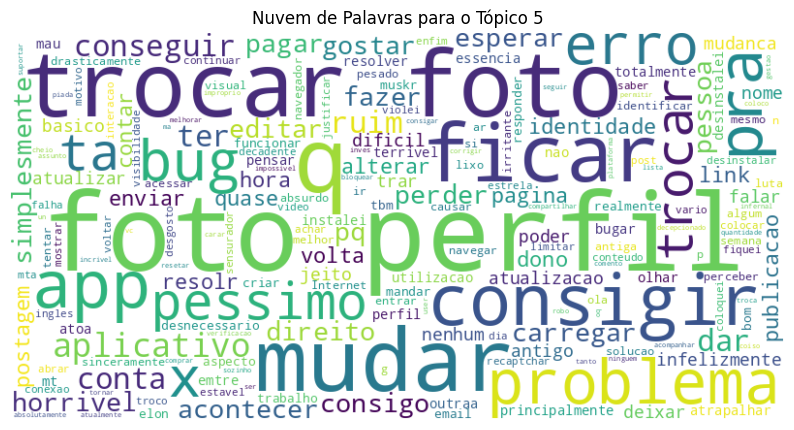

In [ ]:
# Nuvem de palavras para um tópico específico
topic_num = 5  # por exemplo, tópico 5
topic_docs = df_topics[df_topics['Topic'] == topic_num]['Doc']
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(topic_docs))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Nuvem de Palavras para o Tópico {topic_num}')
plt.show()


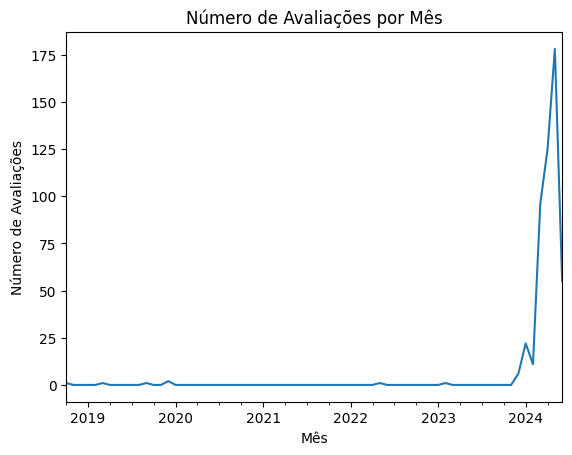

In [ ]:
df['date'] = pd.to_datetime(df['at'])
df.set_index('date', inplace=True)

# Contagem de avaliações por mês
df.resample('M').size().plot()
plt.title('Número de Avaliações por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Avaliações')
plt.show()


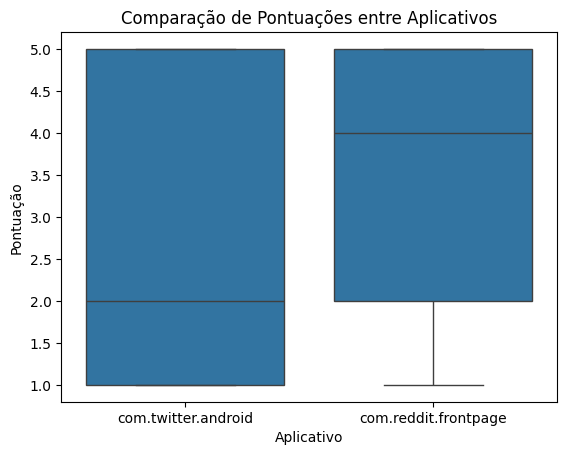

In [ ]:
app_ids = ['com.twitter.android', 'com.reddit.frontpage']  # Lista de IDs de aplicativos

all_reviews = []
for app_id in app_ids:
    result, _ = reviews(
        app_id,
        lang='pt',
        country='br',
        sort=Sort.MOST_RELEVANT,
        count=500,
    )
    for r in result:
        r['app_id'] = app_id
    all_reviews.extend(result)

df_all = pd.DataFrame(all_reviews)
sns.boxplot(x='app_id', y='score', data=df_all)
plt.title('Comparação de Pontuações entre Aplicativos')
plt.xlabel('Aplicativo')
plt.ylabel('Pontuação')
plt.show()


In [ ]:
import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove menções
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove pontuação
    text = re.sub(r'\d+', '', text)  # Remove números
    return text

df['clean_content'] = df['content'].apply(clean_text)


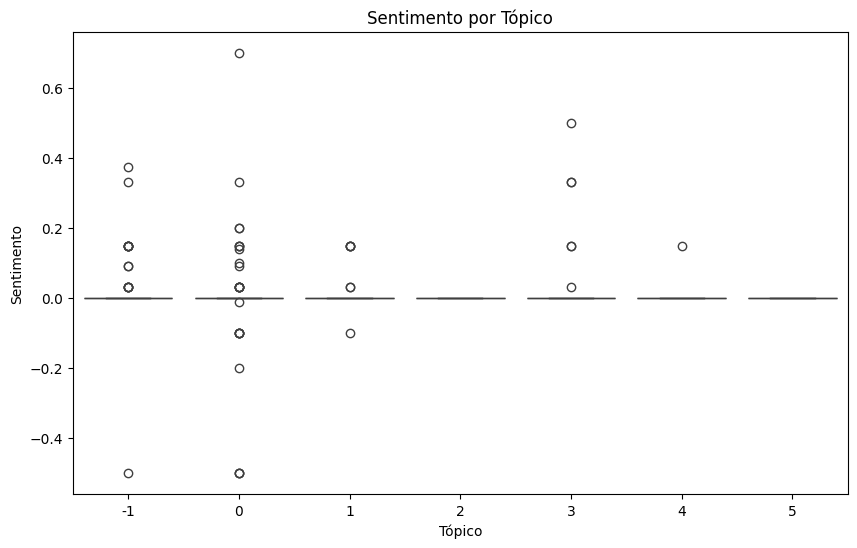

In [ ]:
df_topics['sentiment'] = df_topics['Doc'].apply(get_sentiment)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Topic', y='sentiment', data=df_topics)
plt.title('Sentimento por Tópico')
plt.xlabel('Tópico')
plt.ylabel('Sentimento')
plt.show()
